In [ ]:
import pandas as pd 
import numpy as np

## نورمال سازی دیتا ها مناسب شدن برای تحلیل احساسات

## دیتای توویتر

In [ ]:

df = pd.read_csv("D:\code\projects\EmoLex(امولکس)\Data\MainData\Data.csv")


unique_classes = df['label'].unique()
class_count = df['label'].nunique()

print("کلاس‌های یکتا:", unique_classes)
print("تعداد کلاس‌ها:", class_count)

# ذخیره نسخه تمیزشده
df.to_csv("Data_clean.csv", index=False)


## یکه کردن کلاس لیبل 

In [ ]:
import pandas as pd


df = pd.read_csv("D:\code\projects\EmoLex(امولکس)\Data\MainData\Data_clean.csv", sep=None, engine="python", encoding="utf-8-sig")


label_col = df.columns[-1]


df[label_col] = (
    df[label_col]
    .astype(str).str.strip().str.lower()
    .map(mapping)
)


unmapped = df[label_col].isna()
if unmapped.any():
    print("Warning: Unknown labels found at rows:", df[unmapped].index.tolist())


df.to_csv("Data.csv", index=False, encoding="utf-8-sig")
print("Labels converted to: happy, sad, neutral (saved in Data.csv).")


## اپر کیس کردن کلاس لیبل

In [ ]:
import pandas as pd

file_path = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\Data.csv"

df = pd.read_csv(file_path)

df["label"] = df["label"].str.upper()

df.to_csv(file_path, index=False, encoding='utf-8-sig')



## اسنپ فود

## بک اپ گیری از دیتا در پوشه دیتا های اصلی و شمارش کلاس ها 

In [ ]:
import pandas as pd
import csv
import shutil
from pathlib import Path
import os

file_path = Path("D:\code\projects\EmoLex(امولکس)\Data\اسنپ فود\Snappfood - Sentiment AnalysisُSnappfoodData.csv")
backup_path = Path(os.getcwd()) / "snappfood.csv"
shutil.copy(file_path, backup_path)

detected_sep = None
with open(file_path, 'r', encoding='utf-8-sig', errors='replace') as f:
    sample = ''.join([next(f) for _ in range(200)])
    try:
        dialect = csv.Sniffer().sniff(sample, delimiters=[',',';','\t','|'])
        detected_sep = dialect.delimiter
    except Exception:
        pass

candidates = [s for s in [detected_sep, ',', ';', '\t', '|'] if s]
df = None
for sep in candidates:
    try:
        df = pd.read_csv(file_path, sep=sep, engine='python', encoding='utf-8-sig', quoting=csv.QUOTE_MINIMAL)
        break
    except:
        pass

if df is not None and "label" in df.columns:
    print(df["label"].unique())
    print(df["label"].nunique())
    print(df["label"].value_counts())


## حدف کلاس ها و  ستون هایی که به درد نمیخورن 

In [ ]:
import pandas as pd

file_path = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\snappfood.csv"

# Read as tab-separated
df = pd.read_csv(file_path, sep="\t", encoding="utf-8-sig")

# Drop label_id if it exists
if "label_id" in df.columns:
    df.drop(columns=["label_id"], inplace=True)

# Save back to same file
df.to_csv(file_path, sep="\t", index=False, encoding="utf-8-sig")


## شمارش کلاس

In [ ]:
import pandas as pd
import csv

file_path = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\snappfood.csv"

def load_tsv_robust(path: str) -> pd.DataFrame:
    try:
        return pd.read_csv(path, sep="\t", engine="python", encoding="utf-8-sig",
                           quoting=csv.QUOTE_MINIMAL)
    except Exception:
        try:
            return pd.read_csv(path, sep="\t", engine="python", encoding="utf-8-sig",
                               quoting=csv.QUOTE_NONE, escapechar="\\")
        except Exception:
            with open(path, "r", encoding="utf-8-sig", errors="replace") as f:
                header = f.readline().rstrip("\r\n")
                cols = header.split("\t")
                exp = len(cols)
                rows = []
                for line in f:
                    parts = line.rstrip("\r\n").split("\t", maxsplit=exp-1)
                    if len(parts) < exp:
                        parts += [""] * (exp - len(parts))
                    rows.append(parts)
            df = pd.DataFrame(rows, columns=[c.replace("\ufeff", "").strip() for c in cols])
            return df

df = load_tsv_robust(file_path)

# normalize column names just in case
df.columns = [c.strip() for c in df.columns]

if "label" in df.columns:
    print("Unique classes:", df["label"].unique())
    print("Number of classes:", df["label"].nunique())
    print("\nCount per class:")
    print(df["label"].value_counts())
else:
    print("No 'label' column found. Columns are:", df.columns.tolist())


## تیدبل به کلاس یکه

In [ ]:
import pandas as pd
import re

file_path = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\snappfood.csv"

# Load as tab-separated
df = pd.read_csv(file_path, sep="\t", engine="python", encoding="utf-8-sig", on_bad_lines="skip")

# Normalize column names
df.columns = [c.strip() for c in df.columns]

# Remove rows where label is exactly "0" or "1"
df = df[~df["label"].isin(["0", "1"])]

# Clean the label column
df["label"] = df["label"].apply(lambda x: re.sub(r'\t.*', '', str(x)).strip())

# Save back to same file
df.to_csv(file_path, sep="\t", index=False, encoding="utf-8-sig")

# Check the unique classes after cleaning
print(df["label"].unique())


## حذف کردن رکورد هایی که nan هستند

In [ ]:
import pandas as pd
import re
import numpy as np

file_path = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\snappfood.csv"

df = pd.read_csv(file_path, sep="\t", engine="python", encoding="utf-8-sig", on_bad_lines="skip")
df.columns = [c.strip() for c in df.columns]

# Remove rows where label is exactly "0" or "1"
df = df[~df["label"].isin(["0", "1"])]

# Clean up tabs/quotes
df["label"] = df["label"].apply(lambda x: re.sub(r'\t.*', '', str(x)).strip())

# Convert "nan" string to real NaN
df["label"] = df["label"].replace("nan", np.nan)

# Drop rows where label is NaN
df = df.dropna(subset=["label"])

# Save back to same file
df.to_csv(file_path, sep="\t", index=False, encoding="utf-8-sig")

print(df["label"].unique())


## دیتا ست فارسی 

In [ ]:
import pandas as pd

# مسیر فایل CSV
file_path = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\IrainianDataSet.csv"

# خواندن فایل
df = pd.read_csv(file_path)

# پیدا کردن ستون لیبل
label_col = None
for col in df.columns:
    if col.lower() in ["label", "labels", "emotion", "emotions"]:
        label_col = col
        break

if label_col:
    # شمارش تعداد هر کلاس
    class_counts = df[label_col].value_counts()
    print("تعداد هر کلاس:")
    print(class_counts)
else:
    print("ستون لیبل در این دیتاست پیدا نشد.")


## دستا ست ایرانی دوم

In [ ]:
import pandas as pd
from pathlib import Path

# --- Paths ---
src = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\newdataset.csv"
out_main = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\combined_fa_named.csv"
out_backup = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\IranianDataSet2.csv"

# Make sure the source exists
if not Path(src).exists():
    raise FileNotFoundError(f"Source file not found: {src}")

# Read only first two columns and name them directly
df = pd.read_csv(
    src,
    header=None,          # treat file as no header row
    usecols=[0, 1],       # keep only col 0 and 1
    names=["comments", "label"],
    dtype=str,            # keep everything as string (safer for text)
    encoding="utf-8"      # adjust if your file uses another encoding
)

# Optional cleaning (safe to keep)
df["comments"] = df["comments"].astype(str).str.strip()
df["label"] = df["label"].astype(str).str.strip()

# Save outputs
df.to_csv(out_main, index=False, encoding="utf-8-sig")
df.to_csv(out_backup, index=False, encoding="utf-8-sig")

print(f"Saved: {out_main}")
print(f"Backup: {out_backup}")
print("Shape:", df.shape)
print("Head:\n", df.head())


## شمارش کلاس و حدف در صورت نیاز

In [ ]:

df = pd.read_csv("D:\code\projects\EmoLex(امولکس)\Data\MainData\IranianDataSet2.csv")
result = df["label"].value_counts()
print(result)


## حذف ستون های خالی و به درد نخور

In [ ]:
file_path = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\IranianDataSet2.csv"

df = pd.read_csv(file_path)

df = df.dropna(subset=["label"])

df = df[df["label"].str.lower() != "other"]

df = df.reset_index(drop=True)

df.to_csv(file_path, index=False, encoding="utf-8-sig")

## گرفتن شمارش کلاس دوباره

In [ ]:

file_path = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\IranianDataSet2.csv"

df = pd.read_csv(file_path)

class_counts = df["label"].value_counts()

num_classes = class_counts.shape[0]

print("📊 Class counts after cleaning:")
print(class_counts)
print(f"\n🔢 Number of unique classes: {num_classes}")


##  دیتا ست ایرانی سوم

In [ ]:
df = pd.read_csv("D:\code\projects\EmoLex(امولکس)\Data\MainData\iraniandataset3.csv")
result = df["label"].value_counts()
print(result)

## حذف دیتا ها OTHER

In [ ]:
file_path = r"D:\code\projects\EmoLex(امولکس)\Data\MainData\IranianDataSet3.csv"

df = pd.read_csv(file_path)

df = df.dropna(subset=["label"])

df = df[df["label"].str.lower() != "other"]

df = df.reset_index(drop=True)

df.to_csv(file_path, index=False, encoding="utf-8-sig")

## شمارش دوباره

In [ ]:
df = pd.read_csv("D:\code\projects\EmoLex(امولکس)\Data\MainData\iraniandataset3.csv")
result = df["label"].value_counts()
print(result)

## 📦  دیجی‌کالا: خوشه‌بندی داده‌ها

به دلیل **نداشتن برچسب** در داده‌ها، از روش **کلاسترینگ** برای خوشه‌بندی استفاده می‌کنیم.  
پس از انجام خوشه‌بندی، به هر خوشه یک **برچسب مناسب** اختصاص داده می‌شود.  

---

### 📌 الگوریتم مورد استفاده:
- **K-Means Clustering**

---

### 📊 حجم داده‌ها:
- **۷ میلیون رکورد**

---

### 🔄 مراحل کلی کار:
1. **پیش‌پردازش داده‌ها** (پاک‌سازی و آماده‌سازی)
2. **اجرای الگوریتم K-Means**
3. **تحلیل خوشه‌ها**
4. **برچسب‌گذاری خوشه‌ها** (Labeling)
5. **ذخیره‌سازی نتایج**

---

💡 نکته: به دلیل حجم بالای داده‌ها، استفاده از **پردازش موازی** و **بهینه‌سازی حافظه** توصیه می‌شود.


## 🔹 مرحله ۱: حذف ستون‌های اضافه

قبل از اجرای الگوریتم **K-Means**، باید فقط ستون‌های مورد نیاز برای خوشه‌بندی را نگه داریم  
و بقیه ستون‌ها (که در فرآیند خوشه‌بندی استفاده نمی‌شوند) را حذف کنیم.

In [ ]:
import pandas as pd

# مسیر فایل
file_path = r"D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\digikala-comments.csv"

# خواندن CSV
df = pd.read_csv(file_path, encoding="utf-8-sig")

# ستون‌هایی که می‌خواهیم نگه داریم
keep_cols = ["body", "title", "advantages", "disadvantages", "rate", "recommendation_status"]

# حذف ستون‌های اضافی
df = df[keep_cols]

# ذخیره روی همان فایل (بازنویسی)
df.to_csv(file_path, index=False, encoding="utf-8-sig")

print("✅ فایل تمیز شد و فقط ستون‌های اصلی باقی ماندند.")
print("ستون‌های فعلی:", df.columns.tolist())
print("تعداد ردیف‌ها:", len(df))


## 🔹 مرحله ۲: نرمال‌سازی و سبک‌سازی داده‌ها

بعد از حذف ستون‌های غیرضروری، باید داده‌ها را **نرمال‌سازی** کنیم تا همه ویژگی‌ها در یک بازه‌ی یکسان قرار بگیرند.  
همچنین برای کاهش مصرف حافظه و سرعت‌بخشیدن به اجرای الگوریتم K-Means، **نوع داده‌ها (Data Types)** را سبک‌سازی می‌کنیم.

---

In [ ]:
import pandas as pd
import re
import unicodedata
from pathlib import Path

# ---------- مسیرها ----------
SRC = r"D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\digikala-comments.csv"
DST = r"D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\digikala-comments-clean-light.csv"

# ---------- تنظیمات سبک‌سازی ----------
CHUNK = 200_000          # بسته به RAM تغییر بده
ENC   = "utf-8-sig"
KEEP_META = True         # اگر فقط text می‌خواهی، False کن

# ---------- الگوها ----------
URL_RE      = re.compile(r"https?://\S+|www\.\S+")
MENTION_RE  = re.compile(r"[@#]\w+")
EMOJI_RE    = re.compile("[" "\U0001F300-\U0001FAFF" "\U00002700-\U000027BF" "\U0001F1E6-\U0001F1FF" "]+", flags=re.UNICODE)
NON_TEXT_RE = re.compile(r"[^\w\s\u0600-\u06FF]", flags=re.UNICODE)
MULTISPACE  = re.compile(r"\s+")

def strip_diacritics(s: str) -> str:
    return "".join(ch for ch in unicodedata.normalize("NFKD", s) if not unicodedata.combining(ch))

def norm_fa(t: str) -> str:
    if not isinstance(t, str): return ""
    t = t.strip()
    if not t: return ""
    t = URL_RE.sub(" ", t)
    t = MENTION_RE.sub(" ", t)
    t = EMOJI_RE.sub(" ", t)
    t = t.replace("ي","ی").replace("ى","ی").replace("ك","ک").replace("ـ"," ")
    t = strip_diacritics(t)
    t = NON_TEXT_RE.sub(" ", t)
    t = t.lower()
    t = MULTISPACE.sub(" ", t).strip()
    return t

# ---------- پردازش چانکی + سبک‌سازی ----------
src = Path(SRC)
if not src.exists():
    raise FileNotFoundError(f"Input not found: {src}")

Path(DST).unlink(missing_ok=True)
first_write = True
total_in = total_out = 0

# برای کاهش حافظه: فقط ستون‌های موردنیاز را می‌خوانیم اگر حاضر باشند
base_cols = ["title","advantages","disadvantages","body","rate","recommendation_status"]
read_sample = pd.read_csv(SRC, nrows=5, encoding=ENC, on_bad_lines="skip")
available = [c for c in base_cols if c in read_sample.columns]
usecols = available if available else None  # اگر هدر متفاوت بود، همه را بخوان و بعد هندل کن

for chunk in pd.read_csv(SRC, chunksize=CHUNK, encoding=ENC, on_bad_lines="skip", usecols=usecols):
    total_in += len(chunk)

    # تضمین وجود ستون‌های متنی
    for col in ["title","advantages","disadvantages","body"]:
        if col not in chunk.columns:
            chunk[col] = ""
        chunk[col] = chunk[col].astype(str).map(norm_fa)

    # ساخت متن نهایی
    chunk["text"] = (chunk["title"] + " " + chunk["advantages"] + " " +
                     chunk["disadvantages"] + " " + chunk["body"]).str.strip()

    # نگه‌داشتن فقط ستون‌های لازم (سبک‌سازی)
    if KEEP_META:
        # rate را کم‌حجم کن، recommendation_status را category کن
        if "rate" in chunk.columns:
            # تلاش برای تبدیل امن به عدد کوچک
            chunk["rate"] = pd.to_numeric(chunk["rate"], errors="coerce").astype("float32")
            # می‌توانی اگر صحیح بود، به int8 هم تبدیل کنی:
            # chunk["rate"] = pd.to_numeric(chunk["rate"], errors="coerce").fillna(-1).astype("int8")
        else:
            chunk["rate"] = pd.NA

        if "recommendation_status" in chunk.columns:
            chunk["recommendation_status"] = chunk["recommendation_status"].astype("string").str.strip().str.lower().astype("category")
        else:
            chunk["recommendation_status"] = pd.Categorical([])

        out = chunk[["text","rate","recommendation_status"]].copy()
    else:
        out = chunk[["text"]].copy()

    # حذف سطرهای خالی
    out = out[out["text"] != ""]
    # حذف رکوردهای تکراری
    out = out.drop_duplicates()

    total_out += len(out)

    out.to_csv(DST, mode="a", index=False, encoding="utf-8-sig", header=first_write)
    first_write = False

print(f"✅ Done. Input rows: {total_in:,} -> Kept after cleaning: {total_out:,}")
print(f"Saved to: {DST}")


## 🔹 مرحله ۳: بردارسازی متن + کاهش‌بُعد (برای ۷ میلیون رکورد)

در این مرحله متن‌ها را به بردارهای عددی تبدیل می‌کنیم (**Text Vectorization**) و سپس برای کارایی و سرعت بیشتر، بُعد ویژگی‌ها را کاهش می‌دهیم (**Dimensionality Reduction**).

---

### 🎯 هدف
- تولید ویژگی‌های عددی از متن برای خوشه‌بندی با K-Means
- کم‌کردن ابعاد برای کاهش مصرف RAM/زمان و بهبود کیفیت خوشه‌ها

In [13]:
from pathlib import Path
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.random_projection import SparseRandomProjection
from scipy import sparse
import glob

# مسیرها
FILE = r"D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\digikala-comments-clean-light.csv"
OUT_DIR = Path(r"D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\vec_out_512")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# پارامترها
CHUNK = 200_000
n_features = 2**20     # اگر RAM کمه: 2**18
proj_dim   = 512       # ← افزایش بعد

hv = HashingVectorizer(
    n_features=n_features,
    alternate_sign=False,
    norm="l2",
    lowercase=False,
)

srp = SparseRandomProjection(n_components=proj_dim, random_state=42)

# فیت SRP روی یک چانک نمونه
sample = pd.read_csv(FILE, nrows=CHUNK, encoding="utf-8-sig", usecols=["text"])
X_sample = hv.transform(sample["text"].astype(str))
srp.fit(X_sample)
del sample, X_sample

# تبدیل چانکی و ذخیره
part, total = 0, 0
for chunk in pd.read_csv(FILE, chunksize=CHUNK, encoding="utf-8-sig", usecols=["text"]):
    X_hash = hv.transform(chunk["text"].astype(str))
    X_proj = srp.transform(X_hash)                # (chunk, 512), sparse-ish
    sparse.save_npz(OUT_DIR / f"X512_part{part:05d}.npz", sparse.csr_matrix(X_proj))
    total += len(chunk); part += 1
    print(f"Saved part {part} | rows so far: {total:,}")

# ادغام همه‌ی پارت‌ها به یک npz
parts = sorted(glob.glob(str(OUT_DIR / "X512_part*.npz")))
mats = [sparse.load_npz(p) for p in parts]
X_all_512 = sparse.vstack(mats, format="csr")
ALL_PATH = OUT_DIR / "X_proj_all_512.npz"
sparse.save_npz(ALL_PATH, X_all_512)
print("✅ Done ->", ALL_PATH, "| shape:", X_all_512.shape)


Saved part 1 | rows so far: 200,000
Saved part 2 | rows so far: 371,746
✅ Done -> D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\vec_out_512\X_proj_all_512.npz | shape: (371746, 512)


خوشه بندی

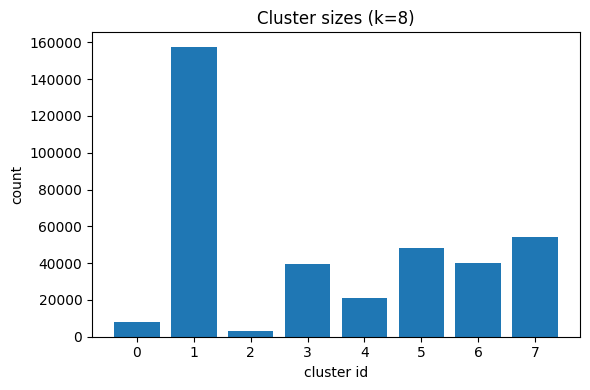

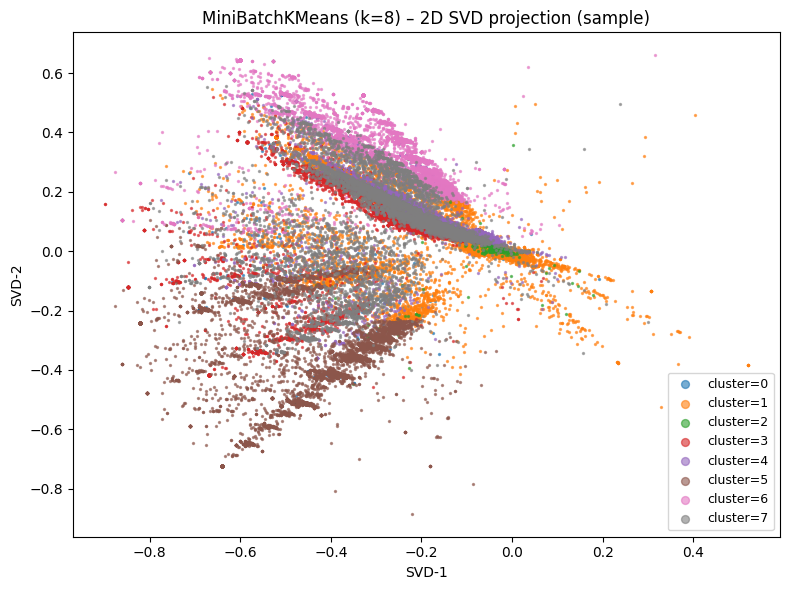

In [14]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.preprocessing import normalize
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
import joblib
import matplotlib.pyplot as plt

# مسیرها
VEC_DIR = Path(r"D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\vec_out_512")
X_PATH  = str(VEC_DIR / "X_proj_all_512.npz")
MODEL8  = str(VEC_DIR / "mbk_k8.joblib")
LAB8_NPY= str(VEC_DIR / "labels_k8.npy")
LAB8_CSV= str(VEC_DIR / "labels_k8.csv")

# بارگذاری و نرمال‌سازی
X = sparse.load_npz(X_PATH)
X = normalize(X, norm="l2", copy=False)

# مدل MiniBatchKMeans با k=8
mbk = MiniBatchKMeans(
    n_clusters=8,
    init="k-means++",
    n_init=30,
    batch_size=50_000,
    max_iter=300,
    reassignment_ratio=0.01,
    random_state=42,
    verbose=0
)
mbk.fit(X)

# ذخیره مدل و برچسب‌ها
joblib.dump(mbk, MODEL8)
labels = mbk.labels_.astype(np.int32)
np.save(LAB8_NPY, labels)
pd.DataFrame({"row_id": np.arange(labels.size), "cluster": labels}).to_csv(
    LAB8_CSV, index=False, encoding="utf-8-sig"
)

# نمودار اندازه خوشه‌ها
uniq, cnt = np.unique(labels, return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(uniq.astype(str), cnt)
plt.title("Cluster sizes (k=8)")
plt.xlabel("cluster id")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# کاهش بُعد و نمایش دوبعدی (نمونه‌گیری)
sample_size = 60_000
rng = np.random.default_rng(42)
idx = rng.choice(X.shape[0], size=sample_size, replace=False)
X_s   = X[idx]
y_s   = labels[idx]

svd2 = TruncatedSVD(n_components=2, random_state=42)
X2 = svd2.fit_transform(X_s)

plt.figure(figsize=(8,6))
for c in np.unique(y_s):
    m = (y_s == c)
    plt.scatter(X2[m,0], X2[m,1], s=2, alpha=0.6, label=f"cluster={c}")
plt.title("MiniBatchKMeans (k=8) – 2D SVD projection (sample)")
plt.xlabel("SVD-1")
plt.ylabel("SVD-2")
plt.legend(markerscale=4, fontsize=9)
plt.tight_layout()
plt.show()


ببینم هر خوشه مناسب چیه

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from pathlib import Path

# مسیر فایل‌ها
TEXT_FILE = r"D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\digikala-comments-clean-light.csv"
LABELS_CSV = r"D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\vec_out_512\labels_k8.csv"
OUT_FILE   = r"D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\vec_out_512\clusters_k8_analysis.txt"

# خواندن متن و برچسب‌ها
texts = pd.read_csv(TEXT_FILE, usecols=["text"], encoding="utf-8-sig")
labels = pd.read_csv(LABELS_CSV)
df = pd.concat([texts, labels["cluster"]], axis=1)

# تابع استخراج کلمات پرتکرار
def get_top_words(text_list, topn=20):
    vectorizer = CountVectorizer(max_features=50, ngram_range=(1,1))
    X = vectorizer.fit_transform(text_list)
    words = vectorizer.get_feature_names_out()
    freqs = X.sum(axis=0).A1
    top_words = sorted(zip(words, freqs), key=lambda x: -x[1])[:topn]
    return [w for w, _ in top_words]

# ساخت گزارش
with open(OUT_FILE, "w", encoding="utf-8") as f:
    for c in sorted(df["cluster"].unique()):
        cluster_texts = df[df["cluster"] == c]["text"].astype(str).tolist()
        
        f.write(f"{'='*40}\n")
        f.write(f"خوشه {c}\n")
        f.write("- نمونه متن‌ها -\n")
        for txt in pd.Series(cluster_texts).sample(10, random_state=42):
            f.write(f"• {txt}\n")
        
        f.write("- کلمات پرتکرار -\n")
        f.write(", ".join(get_top_words(cluster_texts, topn=20)) + "\n\n")

print(f"✅ فایل آنالیز خوشه‌ها ذخیره شد: {OUT_FILE}")


✅ فایل آنالیز خوشه‌ها ذخیره شد: D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا\vec_out_512\clusters_k8_analysis.txt


حالا بریم 8 تا خوشه رو بکنیم 3 تا کلاس و یک فایل سی ای وی جدید بسازیم

,count
sentiment,
SAD,54172
NEUTRAL,205921
HAPPY,111653


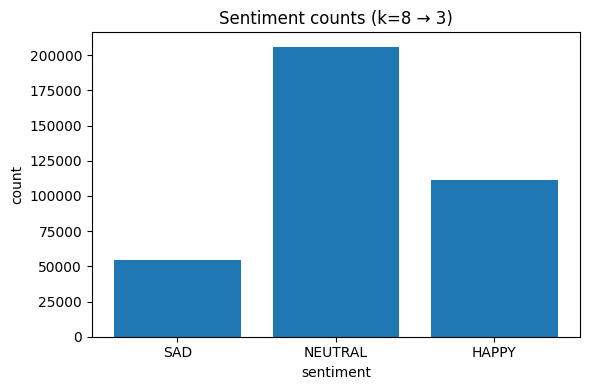

In [16]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# مسیرها
BASE = Path(r"D:\code\projects\EmoLex(امولکس)\Data\دیجی کالا")
TEXT_FILE   = BASE / "digikala-comments-clean-light.csv"
LABELS_CSV  = BASE / "vec_out_512" / "labels_k8.csv"    # خروجی k=8
OUT_CSV     = BASE / "vec_out_512" / "digikala_clustered_final_k8_to3.csv"
OUT_NPY     = BASE / "vec_out_512" / "sentiment_k8_to3.npy"

# 1) خواندن متن و برچسب خوشه‌ها (k=8)
texts  = pd.read_csv(TEXT_FILE, usecols=["text"], encoding="utf-8-sig")
labels = pd.read_csv(LABELS_CSV)   # columns: row_id, cluster  یا فقط cluster

# اگر ستون 'cluster' نبود، نام ستون را پیدا کن
if "cluster" not in labels.columns:
    # اولین ستونی که عددی است را به‌عنوان cluster می‌گیریم
    for col in labels.columns:
        if pd.api.types.is_integer_dtype(labels[col]) or pd.api.types.is_numeric_dtype(labels[col]):
            labels = labels.rename(columns={col: "cluster"})
            break

df = pd.concat([texts, labels["cluster"]], axis=1)

# 2) نگاشت خوشه‌های 0..7 به سه برچسب (قابل ویرایش توسط شما)
cluster2sent = {
    7: "SAD",
    1: "NEUTRAL",
    5: "NEUTRAL",
    0: "HAPPY",
    2: "HAPPY",
    3: "HAPPY",
    4: "HAPPY",
    6: "HAPPY",
}
df["sentiment"] = df["cluster"].map(cluster2sent).fillna("NEUTRAL")  # پیش‌فرض اگر چیزی جا افتاد

# 3) ذخیره خروجی نهایی
df.to_csv(OUT_CSV, index=False, encoding="utf-8-sig")

# اختیاری: ذخیره برچسب‌ها به صورت عددی
sent2id = {"SAD": 0, "NEUTRAL": 1, "HAPPY": 2}
np.save(OUT_NPY, df["sentiment"].map(sent2id).astype(np.int8).values)

# 4) نمایش شمارش هر برچسب + نمودار
counts = df["sentiment"].value_counts().reindex(["SAD","NEUTRAL","HAPPY"]).fillna(0).astype(int)
display(counts.to_frame("count"))

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.title("Sentiment counts (k=8 → 3)")
plt.xlabel("sentiment")
plt.ylabel("count")
plt.tight_layout()
plt.show()
